# Exploratory Data Analysis of Student Data on Zumbi-Venom Game


In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
from datetime import datetime
import re

## Restricting data from db dump to experiment on day 11-07-2019

In [2]:
path = "executions-bkp-30-08-19.json"
raw_data = pd.read_json(path, lines=True)
# data.head()
# Filtrar time stamp para 11/07/2019 das 10 as 12 GMT-03:00
data_venom = raw_data.loc[lambda df: df.timestamp > '2019-08-17 12:30:00']
data_venom = data_venom.loc[lambda df: df.timestamp < '2019-08-17 14:00:00']
data_venom.to_json("executions-experiments-zv-group1.json", orient='split')

In [3]:
path = "executions-experiments-zv-group1.json" 
data_group1 = pd.read_json(path, orient="split")
data_group1.describe()

,_id,payload,timestamp,topic
count,10652,10652,10652,10652
unique,10652,2054,10647,2731
top,{'$oid': '5d57fc6e739d8a1fc75afb41'},{},2019-08-17 13:23:48.183000,control/input/submit
freq,1,1345,2,440
first,NaN,NaN,2019-08-17 12:30:00.339000,NaN
last,NaN,NaN,2019-08-17 13:46:01.469000,NaN


In [4]:
path = "executions-bkp-30-08-19.json"
raw_data = pd.read_json(path, lines=True)
# data.head()
# Filtrar time stamp para 11/07/2019 das 10 as 12 GMT-03:00
data_venom = raw_data.loc[lambda df: df.timestamp > '2019-08-17 14:00:00']
data_venom = data_venom.loc[lambda df: df.timestamp < '2019-08-17 15:30:00']
data_venom.to_json("executions-experiments-zv-group2.json", orient='split')

In [5]:
path = "executions-experiments-zv-group2.json" 
data_group2 = pd.read_json(path, orient="split")
data_group2.describe()

,_id,payload,timestamp,topic
count,6734,6734,6734,6734
unique,6734,2012,6733,2457
top,{'$oid': '5d580f90303b4f3cbd2b8411'},"{'track': {'userid': 8, 'caseid': 'df8e315b-3f...",2019-08-17 14:31:02.070000,2019-08-17T14:09:46.481Z-2db891cd-2bfe-a0bb-5b...
freq,1,539,2,179
first,NaN,NaN,2019-08-17 14:06:01.934000,NaN
last,NaN,NaN,2019-08-17 14:40:40.757000,NaN


## Reconstructing user track

In [6]:
def reconstruct_users_track(log):
    users_tracks = dict()
    for index, row in log.iterrows():
        payload = row.payload
        if 'track' in payload and 'userid' in payload['track']:
            user = payload['track']['userid'] 
            if user in users_tracks:
                users_tracks[user].append(row)
            else:
                users_tracks.update({user: [row]})
    return users_tracks

In [7]:
def users_points_history(users_track):
    users_points = dict()
    for user in users_track.keys():
        for log in users_track[user]:
            if 'var/points/set' in log['topic']:
                points=log['payload']['content']
                if user in users_points:
                    users_points[user].append(points)
                else:
                    users_points.update({user: [points]})
    return users_points

In [8]:
def dic_to_dataFrames(dictionary):
    data_frames = []
    for key in dictionary.keys():
        df = pd.DataFrame(dictionary[key],columns=[key])
        data_frames.append(df)

    return pd.concat(data_frames, axis=1)

In [9]:
users_tracks_group1 = reconstruct_users_track(data_group1)
users_tracks_group1.keys()

dict_keys([1, 14, 9, 12, 13, 8, 10, 7, 11])

In [10]:
users_points_group1 = users_points_history(users_tracks_group1)
users_points_group1 = dic_to_dataFrames(users_points_group1)
users_points_group1

,1,14,9,12,13,8,10,7,11
0,100,90.0,110.0,110.0,90.0,90.0,90.0,90.0,90.0
1,90,100.0,100.0,100.0,100.0,80.0,80.0,100.0,80.0
2,80,90.0,90.0,110.0,90.0,70.0,90.0,90.0,70.0
3,70,100.0,100.0,100.0,80.0,60.0,100.0,80.0,60.0
4,60,110.0,NaN,90.0,90.0,50.0,90.0,70.0,50.0
5,50,120.0,NaN,80.0,80.0,60.0,100.0,80.0,NaN
6,60,110.0,NaN,70.0,90.0,50.0,90.0,90.0,NaN
7,70,120.0,NaN,80.0,100.0,40.0,80.0,100.0,NaN
8,60,130.0,NaN,90.0,110.0,50.0,90.0,NaN,NaN
9,50,140.0,NaN,80.0,100.0,60.0,NaN,NaN,NaN


In [11]:
users_points_group1.describe()

,1,14,9,12,13,8,10,7,11
count,18.000000,13.000000,4.000000,12.000000,11.000000,10.000000,9.000000,8.000000,5.000000
mean,55.555556,120.769231,100.000000,91.666667,94.545455,61.000000,90.000000,87.500000,70.000000
std,28.330450,23.615510,8.164966,12.673045,10.357255,15.238839,7.071068,10.350983,15.811388
min,0.000000,90.000000,90.000000,70.000000,80.000000,40.000000,80.000000,70.000000,50.000000
25%,42.500000,100.000000,97.500000,80.000000,90.000000,50.000000,90.000000,80.000000,60.000000
50%,60.000000,120.000000,100.000000,90.000000,90.000000,60.000000,90.000000,90.000000,70.000000
75%,70.000000,140.000000,102.500000,100.000000,100.000000,67.500000,90.000000,92.500000,80.000000
max,100.000000,160.000000,110.000000,110.000000,110.000000,90.000000,100.000000,100.000000,90.000000


In [12]:
users_tracks_group2 = reconstruct_users_track(data_group2)
users_tracks_group2.keys()

dict_keys([13, 12, 11, 9, 8, 7, 10, 14])

In [13]:
users_points_group2 = users_points_history(users_tracks_group2)
users_points_group2 = dic_to_dataFrames(users_points_group2)
users_points_group2

,13,12,11,9,8,7,10,14
0,100,100,100.0,100,100,100.0,100,100.0
1,90,90,NaN,90,90,NaN,90,NaN
2,100,100,NaN,80,80,NaN,80,NaN
3,110,90,NaN,70,70,NaN,70,NaN
4,100,80,NaN,80,80,NaN,80,NaN
5,90,90,NaN,90,90,NaN,70,NaN
6,80,80,NaN,100,100,NaN,60,NaN
7,90,90,NaN,90,90,NaN,50,NaN
8,100,100,NaN,80,80,NaN,40,NaN
9,110,110,NaN,70,90,NaN,50,NaN


## Plotting students points

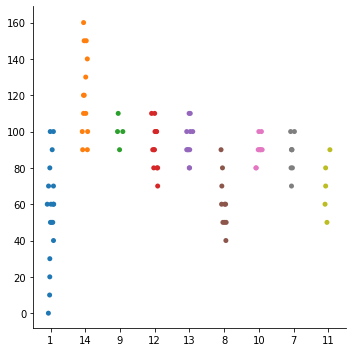

In [14]:
sns.catplot(data=users_points_group1);

## Accuracy Analysis for each group

In [15]:
def count_hit_and_miss(users_track):
    hits_misses = dict()
    for user in users_track.keys():
        hits   = 0
        misses = 0
        for log in users_track[user]:
            if  re.search('knot/\w+_certo/start', log['topic']):
                hits += 1
            if  re.search('knot/\w+_errado/start', log['topic']):
                misses += 1
        hits_misses[user] = {'hits':hits, 'misses':misses}
    return hits_misses

In [16]:
hit_misses = count_hit_and_miss(users_tracks_group1)
hit_misses

{1: {'hits': 3, 'misses': 13},
 14: {'hits': 9, 'misses': 4},
 9: {'hits': 2, 'misses': 2},
 12: {'hits': 6, 'misses': 6},
 13: {'hits': 6, 'misses': 5},
 8: {'hits': 3, 'misses': 7},
 10: {'hits': 4, 'misses': 5},
 7: {'hits': 4, 'misses': 4},
 11: {'hits': 0, 'misses': 5}}

In [17]:
hit_misses = count_hit_and_miss(users_tracks_group2)
hit_misses

{13: {'hits': 11, 'misses': 5},
 12: {'hits': 12, 'misses': 4},
 11: {'hits': 0, 'misses': 0},
 9: {'hits': 5, 'misses': 11},
 8: {'hits': 9, 'misses': 7},
 7: {'hits': 0, 'misses': 0},
 10: {'hits': 8, 'misses': 8},
 14: {'hits': 0, 'misses': 0}}

In [18]:
users_points_group1[12]

0     110.0
1     100.0
2     110.0
3     100.0
4      90.0
5      80.0
6      70.0
7      80.0
8      90.0
9      80.0
10     90.0
11    100.0
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
Name: 12, dtype: float64

In [19]:
users_points_group2[12]

0     100
1      90
2     100
3      90
4      80
5      90
6      80
7      90
8     100
9     110
10    120
11    130
12    140
13    150
14    160
15    170
16    180
Name: 12, dtype: int64